In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 20.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import re

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sos.csv", encoding = 'CP949')
df.head()

,연,월,일,시,분,수신지역,송출내용,target
0,2020,1,26,9,9,중구,[중구청] 오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우...,기타
1,2020,1,28,16,59,광진구,[광진구청] 신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻...,전염병
2,2020,1,30,9,49,송파구,[송파구청]감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다...,전염병
3,2020,1,31,14,31,강남구,"[강남구]중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,...",전염병
4,2020,1,31,15,5,강남구,"[강남구]중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후...",전염병


In [ ]:
# 송출내용, 라벨만 남기고 제거
df = df.drop(columns=['연', '월', '일', '시', '분', '수신지역'])
df.head()

,송출내용,target
0,[중구청] 오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우...,기타
1,[광진구청] 신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻...,전염병
2,[송파구청]감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다...,전염병
3,"[강남구]중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,...",전염병
4,"[강남구]중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후...",전염병


In [ ]:
# 라벨 더미변수로 바꾸기
'''
전염병: 0, 태풍: 1, 호우: 2, 한파: 3, 교통: 4, 홍수: 5, 대설:6, 폭염: 7, 산사태: 8, 기타: 9
'''

# 라벨 매핑
label_mapping = {
    '전염병': 0, '태풍': 1, '호우': 2, '한파': 3, '교통': 4,
    '홍수': 5, '대설': 6, '폭염': 7, '산사태': 8, '기타': 9
}


# 라벨을 더미 변수로 변환하여 새로운 데이터프레임 생성
new_df = df.replace({'target': label_mapping})

new_df.head(10)

,송출내용,target
0,[중구청] 오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우...,9
1,[광진구청] 신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻...,0
2,[송파구청]감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다...,0
3,"[강남구]중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,...",0
4,"[강남구]중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후...",0
5,[은평구청]은평성모병원환자코로나19추가확진자발생.성모병원부분일시폐쇄.발열호흡기증상시...,0
6,"[강동구]코로나19 2번째 확진자 발생. 성내동 거주 66세(중국인), 2.24. ...",0
7,"[송파구] 코로나19 확진자 2명 추가 발생, 23일 문정동 확진자의 가족으로 서울...",0
8,"[은평구청]금일코로나19확진추가2명발생,2.1부터은평성모병원입퇴원주민중발열 호흡기증...",0
9,"[강동구] 코로나19 확진자 2명 추가 발생, 자세한내용은 강동구 홈페이지를 참고 ...",0


In [ ]:
import re
# 정규 표현식 패턴 설정
pattern = r'\[[^\]]+\]'

# 정규 표현식을 사용하여 패턴을 찾아서 삭제
new_df['송출내용'] = new_df['송출내용'].apply(lambda x: re.sub(pattern, '', x))

new_df.head()

,송출내용,target
0,오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우회하여 주...,9
1,신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻기 중국방문...,0
2,감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다. 확진자는...,0
3,"중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,인후통 등...",0
4,"중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후통등) 발...",0


In [ ]:
# 불용어 사전 불러오기

# 한글 불용어 사전 파일 경로
stopwords_path = '/content/drive/MyDrive/Colab Notebooks/stopwords-ko.txt'

# 파일 읽기
with open(stopwords_path, "r", encoding="utf-8") as file:
    stopwords = file.readlines()

# 각 불용어의 좌우 공백과 개행문자 제거
stopwords = [word.strip() for word in stopwords]

# 추가 불용어
stopwords.extend(['[', ']'])
print(stopwords)

['!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '...', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '\\', '^', '_', '`', '|', '~', '·', '—', '——', '‘', '’', '“', '”', '…', '、', '。', '〈', '〉', '《', '》', '가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '

In [ ]:
# 불용어 처리

# Okt 형태소 분석기 생성
okt = Okt()

# 특수 단어 리스트 정의
special_words = ['확진자', '서울의료원']

# 텍스트 전처리 함수 정의
def preprocess_text_korean(text):
    # 특수 문자 제거
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', text)

    # 형태소 분석 및 불용어 제거
    tokens = okt.pos(text, stem=True)

    # 명사와 동사/형용사만 남기기 및 불용어 제거
    tokens = [word for word, pos in tokens if pos in ['Noun', 'Verb', 'Adjective'] and word not in stopwords]

    # 특정 단어들을 하나의 토큰으로 결합
    for special_word in special_words:
        while special_word in tokens:
            index = tokens.index(special_word)
            tokens[index:index + len(special_word)] = [special_word]

    # 토큰을 다시 문자열로 합침
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# '송출내용' 열에 전처리 적용
df['preprocessed_송출내용'] = df['송출내용'].apply(preprocess_text_korean)

# 변경된 내용을 확인하기 위해 데이터프레임의 처음 몇 행 출력
df[['송출내용', 'preprocessed_송출내용']].head(10)


,송출내용,preprocessed_송출내용
0,[중구청] 오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우...,중구청 오늘 경 중구 장충동 앰버 서다 호텔 내 화재 발생 지역 우회 하다 주시 인...
1,[광진구청] 신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻...,광진 구청 신종 코로나바이러스 감염증 예방 칙 마스크 착용 흐르다 물 초이 손씻기 ...
2,[송파구청]감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다...,송파 구청 감염증 대응 위해 청장 중심 대책 본부 운영 확 진자 없다 발열 증상 시...
3,"[강남구]중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,...",강남구 중국 방문 후 이내 발열 호흡기 증상 기침 후통 발 현시 강남구 재난 안전 ...
4,"[강남구]중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후...",강남구 중국 방문 후 내 발열 호흡기 증상 기침 후통 발현 시 강남구 재난 안전 대...
5,[은평구청]은평성모병원환자코로나19추가확진자발생.성모병원부분일시폐쇄.발열호흡기증상시...,은평 구청 은평 성모 병원 환자 코로나 추가 확 진자 발생 성모 병원 부분 일시 폐...
6,"[강동구]코로나19 2번째 확진자 발생. 성내동 거주 66세(중국인), 2.24. ...",강동구 코로나 확 진자 발생 성내동 거주 중국인 확진 판정 흑석동 중대 병원 격리 ...
7,"[송파구] 코로나19 확진자 2명 추가 발생, 23일 문정동 확진자의 가족으로 서울...",송파구 코로나 확 진자 명 추가 발생 문정동 확 진자 가족 의료 격리 조치 하다 자...
8,"[은평구청]금일코로나19확진추가2명발생,2.1부터은평성모병원입퇴원주민중발열 호흡기증...",은평 구청 금일 코로나 확진 추가 발생 은평 성모 병원 입 퇴원 주민 발열 호흡기 ...
9,"[강동구] 코로나19 확진자 2명 추가 발생, 자세한내용은 강동구 홈페이지를 참고 ...",강동구 코로나 확 진자 명 추가 발생 자세하다 내용 강동구 홈페이지 참고 바라다


In [ ]:
# TF-IDF 벡터라이저 생성

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)

# 텍스트 데이터를 학습 및 변환
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_송출내용'])

# 결과 매트릭스의 형태 출력
print(tfidf_matrix.shape)
tfidf_matrix


(9348, 100)


<9348x100 sparse matrix of type '<class 'numpy.float64'>'
	with 97622 stored elements in Compressed Sparse Row format>

In [ ]:
# TF-IDF 결과를 데이터프레임으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(100)

,가깝다,가족,강남,강동구청,강북구청,강서,강서구,거리,거주지,검사,...,참고,참조,추가,추후,카카오,코로나,하다,현재,홈페이지,확인
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.196625,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.0,0.0,0.410852,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.359045,0.0,0.0,0.238316,0.000000,0.0,0.176420,0.000000
96,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.218241,0.0,0.285663,0.0,0.0,0.189608,0.195417,0.0,0.140363,0.000000
97,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.366933,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.238174,0.245472,0.0,0.000000,0.000000
98,0.0,0.491287,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.259956,0.000000,0.0,0.000000,0.304997


In [ ]:
tfidf_dense = tfidf_matrix.toarray()
tfidf_dense.shape

(9348, 100)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 (거리 기반 클러스터링에 스케일링 필요)
scaler = StandardScaler()
scaled_tfidf = scaler.fit_transform(tfidf_dense)
scaled_tfidf.shape

(9348, 100)

## DBSCAN

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 2. DBSCAN 클러스터링 수행
# DBSCAN 파라미터 설정 (eps와 min_samples는 데이터에 따라 조정 필요)
dbscan = DBSCAN(eps=0.1, min_samples=55)  #
cluster_labels = dbscan.fit_predict(scaled_tfidf)

# 클러스터링 결과를 데이터프레임에 추가
df['cluster'] = cluster_labels

# 클러스터링 결과 출력
df[['preprocessed_송출내용', 'cluster']].head(100)

,preprocessed_송출내용,cluster
0,중구청 오늘 경 중구 장충동 앰버 서다 호텔 내 화재 발생 지역 우회 하다 주시 인...,-1
1,광진 구청 신종 코로나바이러스 감염증 예방 칙 마스크 착용 흐르다 물 초이 손씻기 ...,-1
2,송파 구청 감염증 대응 위해 청장 중심 대책 본부 운영 확 진자 없다 발열 증상 시...,-1
3,강남구 중국 방문 후 이내 발열 호흡기 증상 기침 후통 발 현시 강남구 재난 안전 ...,-1
4,강남구 중국 방문 후 내 발열 호흡기 증상 기침 후통 발현 시 강남구 재난 안전 대...,-1
...,...,...
95,강북구청 추가 확 진자 명 동선 홈페이지 게시 코로나 관련 발열 기침 증상 시 보건...,-1
96,도봉 구청 타구 코로나 추가 확 진자 대한 역학 조사 결과 도봉구 이동 경로 대응조...,-1
97,금천구청 코로나 확산 방지 위해 예배 법회 미사 종교 행사 모임 참석 자제 하다 주...,-1
98,양천구청 코로나 양천구 확 진자 발생 확 진자 가족 상세 내용 양천구 블로그 확인 바라다,-1


In [ ]:
# 클러스터 수 및 각 클러스터에 속하는 포인트 수 확인
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Number of clusters: {num_clusters}')
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)

Number of clusters: 20
-1     7405
 7      185
 3      140
 2      135
 10     128
 9      120
 15     116
 4      107
 8      101
 1       90
 18      86
 12      84
 13      83
 0       82
 17      81
 11      79
 5       77
 16      67
 6       64
 19      61
 14      57
Name: count, dtype: int64


## 클러스터별 주요 키워드 추출 및 출력

In [ ]:
def get_top_keywords(data, clusters, vectorizer, top_n=10):
    cluster_keywords = {}
    for cluster in np.unique(clusters):
        if cluster == -1:  # 노이즈 클러스터는 무시
            continue
        # 클러스터에 속한 문서들 추출
        cluster_data = data[clusters == cluster]
        # 클러스터 중심 벡터 계산 (평균)
        centroid = cluster_data.mean(axis=0)
        # 상위 top_n 키워드 추출
        keywords = [vectorizer.get_feature_names_out()[i] for i in centroid.argsort()[-top_n:]]
        cluster_keywords[cluster] = keywords
    return cluster_keywords

# 주요 키워드 추출
top_keywords = get_top_keywords(scaled_tfidf, cluster_labels, vectorizer, top_n=10)

# 주요 키워드 출력
for cluster, keywords in top_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")


Cluster 0: 홈페이지, 블로그, 하다, 내용, 공개, 동선, 확인, 상세, 시기, 동작
Cluster 1: 구청, 발생, 바라다, 블로그, 내용, 상세, 참조, 안내, 강서, 강서구
Cluster 2: 홈페이지, 블로그, 역학, 코로나, 공개, 동선, 참고, 구청, 구로, 사후
Cluster 3: 바라다, 홈페이지, 블로그, 참고, 방역, 완료, 자세하다, 사항, 북구청, 거주지
Cluster 4: 조사, 공개, 동선, 예정, 사항, 이다, 결과, 도봉, 조치, 이동
Cluster 5: 진자, 구청, 발생, 바라다, 홈페이지, 하다, 블로그, 확인, 시기, 완치
Cluster 6: 홈페이지, 블로그, 역학, 조사, 내용, 방역, 참조, 완료, 중랑, 세부
Cluster 7: 발생, 바라다, 홈페이지, 블로그, 하다, 내용, 확인, 상세, 시기, 완치
Cluster 8: 발생, 홈페이지, 역학, 조사, 공개, 예정, 완료, 이다, 중랑, 진행
Cluster 9: 역학, 코로나, 조사, 방역, 준수, 마스크, 착용, 거리, 두기, 용산
Cluster 10: 홈페이지, 블로그, 역학, 코로나, 조사, 공개, 예정, 자세하다, 사항, 이다
Cluster 11: 진자, 발생, 바라다, 홈페이지, 코로나, 내용, 확인, 상세, 구청, 영등포
Cluster 12: 역학, 코로나, 조사, 내용, 참고, 추가, 관련, 진행중, 현재, 송파
Cluster 13: 홈페이지, 블로그, 역학, 조사, 내용, 참고, 상세, 추후, 진행중, 은평
Cluster 14: 공개, 동선, 예정, 사항, 이다, 결과, 추가, 도봉, 조치, 이동
Cluster 15: 접종, 진자, 발생, 바라다, 홈페이지, 하다, 내용, 참고, 자세하다, 중구청
Cluster 16: 역학, 조사, 내용, 참고, 안내, 시기, 결과, 세부, 강동구청, 기준
Cluster 17: 예상, 사고, 중구청, 접종, 진자, 발생, 자제, 모임, 동구청, 사적
Cluster 18: 발생, 바라다, 블로그, 코로나, 내

## T-SNE로 시각화

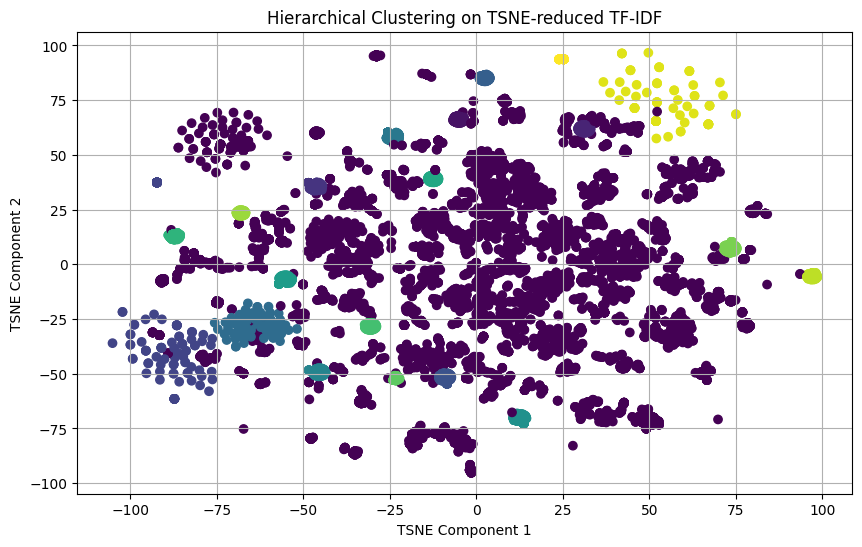

In [ ]:
from sklearn.manifold import TSNE

# TSNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_tfidf)

# TSNE 결과를 시각화
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering on TSNE-reduced TF-IDF')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)
plt.show()

## 비슷한 클러스터끼리 병합

In [ ]:
# Cluster 0, 1, 2, 3:
# 공통적으로 '홈페이지', '블로그', '발생', '내용', '확인', '구청', '상세' 등으로
# 일반적인 정보 나타냄
# 라벨: 0 할당.

# Cluster 5, 6, 7, 11, 12, 13:
# 공통적으로 '홈페이지', '블로그', '역학', '조사', '방역', '참조', '완료', '세부'
# 역학 조사 클러스터
# 라벨: 1 할당

# Cluster 18, 19:
# 공통적으로 '발생', '바라다', '블로그', '코로나', '내용', '상세', '참조', '안내', '강서', '강서구'
# 코로나 관련 공지 클러스터
# 라벨: 2 할당

# Cluster 4, 8, 10, 14, 15:
# 공통적으로 '공개', '동선', '예정', '사항' 등의 키워드로 공개된 이동 경로와 일정
# 이동 경로 및 일정 공지 클러스터
# 라벨: 3 할당

# Cluster 9, 16:
# 공통적으로 '역학', '코로나', '조사', '방역', '준수', '마스크' 등의 키워드로 역학 조사 및 방역 조치
# 방역 조치 및 마스크 클러스터
# 라벨: 4할당

# Cluster 17:
# '사고', '중구청', '접종', '모임', '사적' 등의 키워드로 사고 및 예방 조치
# 사적 모임 자제 클러스터
# 라벨: 5할당

## 병합

In [34]:
# 클러스터 재할당을 위한 매핑 딕셔너리

cluster_mapping = {
    0: 0, 1: 0, 2: 0, 3: 0,  # 일반적인 정보 클러스터
    5: 1, 6: 1, 7: 1, 11: 1, 12: 1, 13: 1,  # 역학 조사 클러스터
    18: 2, 19: 2,  # 코로나 관련 공지 클러스터
    4: 3, 8: 3, 10: 3, 14: 3, 15: 3,  # 이동 경로 및 일정 공지 클러스터
    9: 4, 16: 4,  # 방역 조치 및 마스크 클러스터
    17: 5,  # 사고 및 예방 조치 클러스터
    -1: -1  # 노이즈 클러스터 (제외)
}

# 클러스터 재할당
df['merged_cluster'] = df['cluster'].map(cluster_mapping)

# -1(noise) 제외한 새로운 데이터프레임 생성
new_df = df[df['merged_cluster'] != -1][['preprocessed_송출내용', 'cluster', 'merged_cluster']]

# 결과 확인
new_df

,preprocessed_송출내용,cluster,merged_cluster
370,동작 구청 동작구 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다,0,0
393,동작 구청 동작구 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다,0,0
395,동작 구청 동작구 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다,0,0
413,동작 구청 동작구 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다,0,0
475,동작 구청 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다,0,0
...,...,...,...
7903,동구청 번 확 진자 발생 이하 명 대대 명 대대 명인 사적 모임 자제 부탁드리다,17,5
7905,중구청 번 명 확 진자 발생 자세하다 내용 중구청 홈페이지 참고 하다 바라다,15,3
7907,도봉 구청 수 확 진자 명 발생 번번 역학 조사 결과 이동 동선 조치 사항 홈페이지...,4,3
7910,영등포 구청 코로나 확 진자 명 발생 상세 내용 영등포구 카카오 알림 톡 확인 바라다,19,2


## T-SNE로 시각화

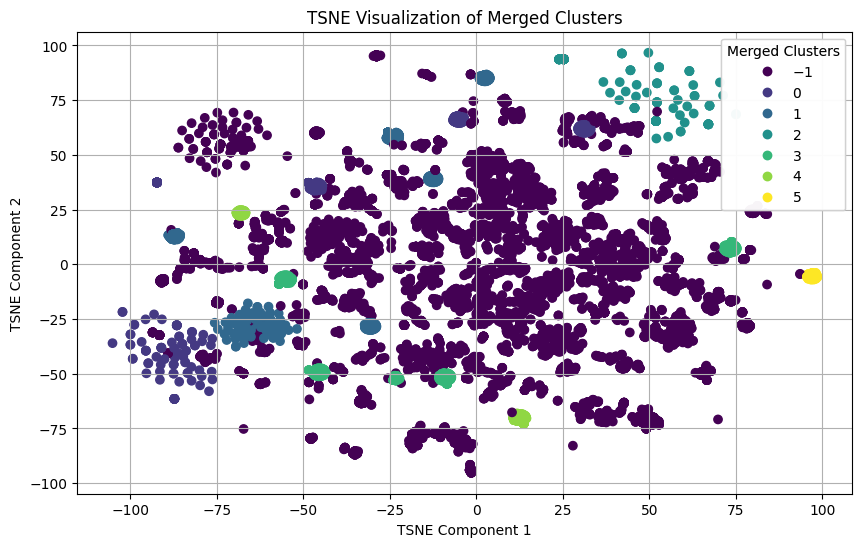

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# TSNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_tfidf)

# TSNE 결과를 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['merged_cluster'], cmap='viridis', marker='o')
plt.title('TSNE Visualization of Merged Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)

# 범례 추가
legend1 = plt.legend(*scatter.legend_elements(), title="Merged Clusters")
plt.gca().add_artist(legend1)

plt.show()


In [31]:
# 클러스터 수 및 각 클러스터에 속하는 포인트 수 확인
num_clusters = len(set(df['merged_cluster'])) - (1 if -1 in df['merged_cluster'].values else 0)
print(f'Number of clusters: {num_clusters}')
cluster_counts = df['merged_cluster'].value_counts()
print(cluster_counts)

Number of clusters: 6
merged_cluster
-1    7405
 1     572
 3     509
 0     447
 4     187
 2     147
 5      81
Name: count, dtype: int64


In [33]:
# 주요 키워드 추출

def get_top_keywords(data, clusters, vectorizer, top_n=10):
    cluster_keywords = {}
    for cluster in np.unique(clusters):
        if cluster == -1:  # 노이즈 클러스터는 무시
            continue
        # 클러스터에 속한 문서들 추출
        cluster_data = data[clusters == cluster]
        # 클러스터 중심 벡터 계산 (평균)
        centroid = cluster_data.mean(axis=0)
        # 상위 top_n 키워드 추출
        keywords = [vectorizer.get_feature_names_out()[i] for i in centroid.argsort()[-top_n:]]
        cluster_keywords[cluster] = keywords
    return cluster_keywords

# 주요 키워드 추출
top_keywords = get_top_keywords(scaled_tfidf, df['merged_cluster'].values, vectorizer, top_n=10)

# 주요 키워드 출력
for cluster, keywords in top_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")


Cluster 0: 동선, 동작, 강서, 강서구, 참고, 구로, 블로그, 북구청, 사후, 거주지
Cluster 1: 구청, 바라다, 블로그, 진행중, 홈페이지, 상세, 확인, 시기, 내용, 완치
Cluster 2: 참조, 안내, 코로나, 내용, 영등포, 알림, 상세, 카카오, 강서, 강서구
Cluster 3: 도봉, 조치, 이동, 조사, 공개, 자세하다, 사항, 중구청, 예정, 이다
Cluster 4: 방역, 조사, 강동구청, 기준, 준수, 마스크, 착용, 거리, 두기, 용산
Cluster 5: 예상, 사고, 중구청, 접종, 진자, 발생, 자제, 모임, 동구청, 사적


## 라벨링된 데이터프레임 csv로 저장

In [27]:
# 필요한 컬럼만 선택하고 'merged_cluster'를 'label'로 이름 변경
new_df = new_df[['preprocessed_송출내용', 'merged_cluster']].rename(columns={'merged_cluster': 'label'})

# CSV 파일로 저장
new_df.to_csv('merged_clusters.csv', index=False, encoding='utf-8')

# 결과 확인
print(new_df.head(100))

                                      preprocessed_송출내용  label
370    동작 구청 동작구 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다      0
393    동작 구청 동작구 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다      0
395    동작 구청 동작구 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다      0
413    동작 구청 동작구 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다      0
475        동작 구청 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다      0
...                                                 ...    ...
2204       동작 구청 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다      0
2218       동작 구청 확 진자 동선 공개 상세 내용 홈페이지 블로그 확인 하다 시기 바라다      0
2238        구청 확 진자 완치 명 발생 상세 내용 홈페이지 블로그 확인 하다 시기 바라다      1
2240  중랑 구청 번 확 진자 면목동 면목동 신내동 발생 역학 조사 진행 중 완료 홈페이지...      3
2250          강서 구청 강서구 확 진자 발생 등촌동 안내 상세 내용 블로그 참조 바라다      0

[100 rows x 2 columns]
